In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
warnings.filterwarnings('ignore')

In [2]:
#improting data
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
#checking NaN values
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [3]:
#corr between variables
df[['InvoiceNo','Quantity','UnitPrice']].corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.001235
UnitPrice,-0.001235,1.000000


In [5]:
#checking InvoiceNo column
df[['InvoiceNo']].sample(10)

,InvoiceNo
349254,567483
248764,558868
148393,549235
435698,574076
240811,558116
347848,567340
541895,581587
539778,581439
74428,C542426
240252,558096


In [8]:
#understanding the meaning of InvoiceNo columns starswith 'C'
df[df.InvoiceNo.str.contains('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
#the average unite price for the InvoiceNo columns starswith 'C'
df[df.InvoiceNo.str.contains('C')==True]['UnitPrice'].mean()

48.39366063738431

In [12]:
#ratio of nan values in columns
df.isnull().sum()/df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [17]:
#dropping nan values
df.dropna(inplace=True)

In [18]:
#Finding the unique number of InvoiceNo
df.InvoiceNo.value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
542630       1
578286       1
555010       1
542615       1
C568345      1
Name: InvoiceNo, Length: 22190, dtype: int64

In [24]:
#average unique items
len(df.InvoiceNo.unique()) / len(df.CustomerID.unique())

5.07548032936871

In [29]:
#Unique item per customer
df.groupby(['InvoiceNo','CustomerID']).count().reset_index().groupby('CustomerID').count().sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
15300.0,1,1,1,1,1,1,1
13833.0,1,1,1,1,1,1,1
16123.0,1,1,1,1,1,1,1
13829.0,1,1,1,1,1,1,1
13828.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
13089.0,118,118,118,118,118,118,118
14606.0,128,128,128,128,128,128,128
17841.0,169,169,169,169,169,169,169


<AxesSubplot:ylabel='Country'>

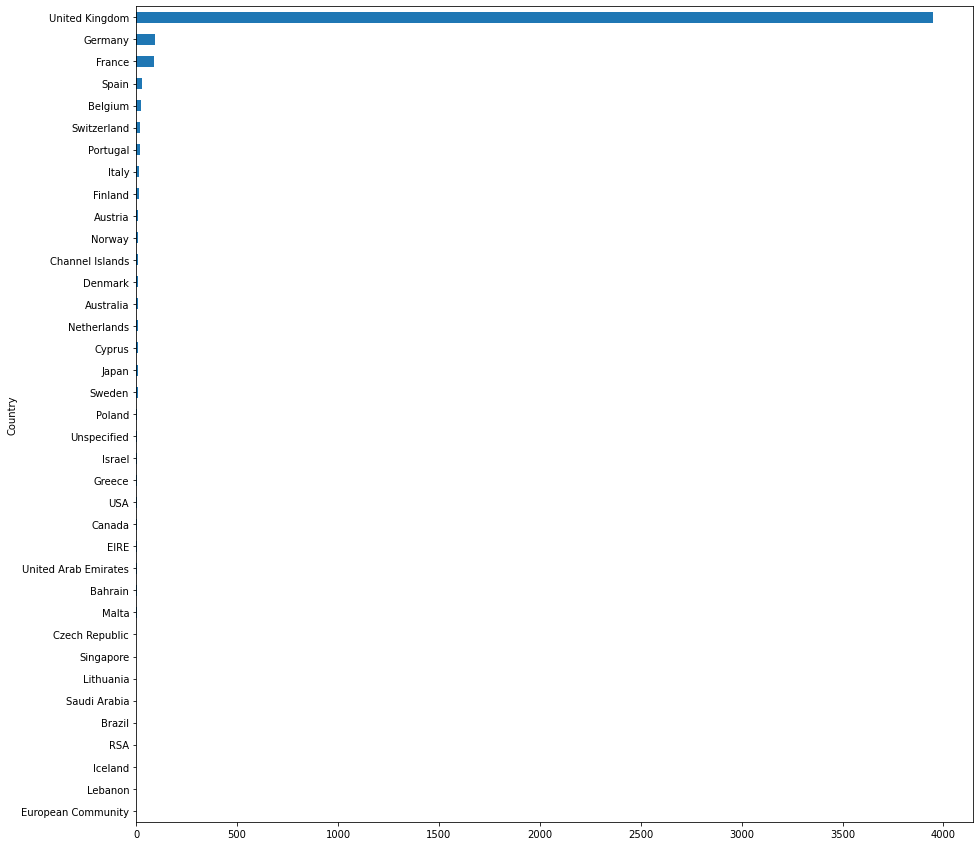

In [37]:
#customerper country
plt.figure(figsize=(15,15))
df.groupby(['CustomerID','Country']).count().reset_index().groupby('Country').count().sort_values('CustomerID')['CustomerID'].plot.barh()

3. Visualize total cost per country

In [39]:
#finding total cost 
df['total_cost']=df.UnitPrice*df.Quantity

<AxesSubplot:ylabel='Country'>

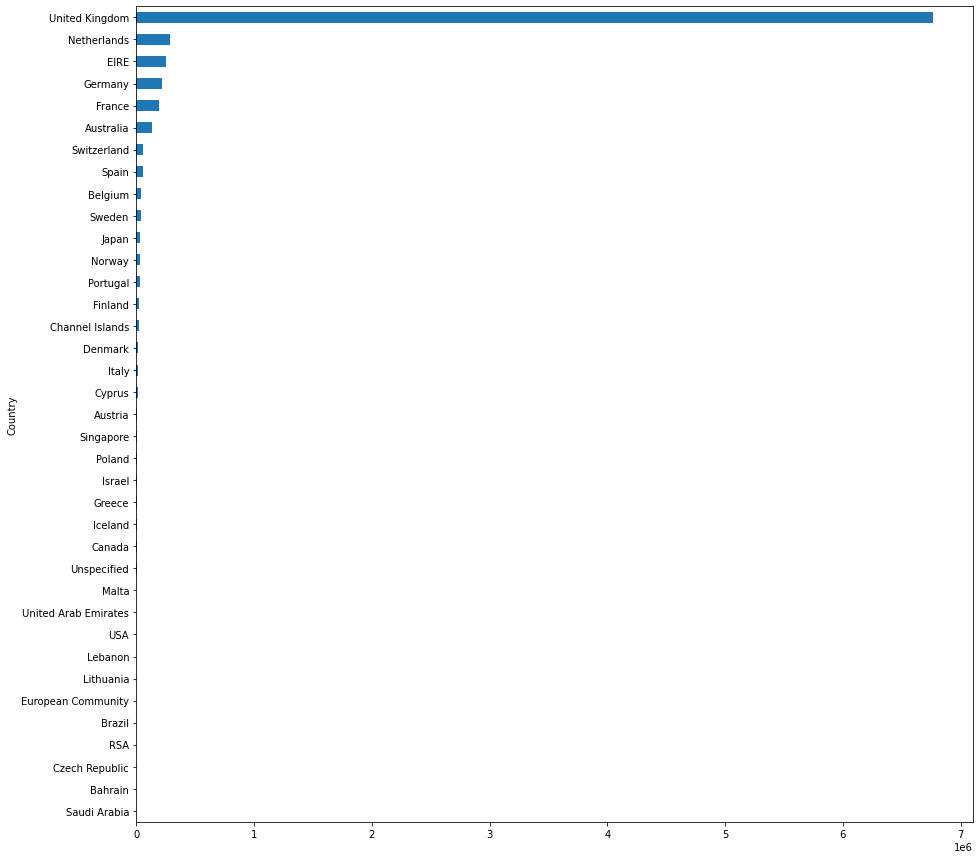

In [43]:
#total cost per country
plt.figure(figsize=(15,15))
df.groupby('Country').sum()['total_cost'].sort_values().plot.barh()

In [44]:
#getting just uk
df_uk = df[df['Country']=='United Kingdom']
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [46]:
#the most popular products that are bought in the UK?
df_uk.groupby('Description').sum()['Quantity'].sort_values().tail()

Description
POPCORN HOLDER                        28562
WHITE HANGING HEART T-LIGHT HOLDER    32097
ASSORTED COLOUR BIRD ORNAMENT         32679
JUMBO BAG RED RETROSPOT               40880
WORLD WAR 2 GLIDERS ASSTD DESIGNS     47982
Name: Quantity, dtype: int64

In [47]:
# review df_uk DataFrame
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [71]:
#getting date value from InvoiceData column
df_uk['date']= df_uk.InvoiceDate.apply(lambda x: x.date())

In [72]:
#groupping customer by summing of quantity, and average price
df_uk_gp_date = df_uk.groupby(['CustomerID','date']).agg({'Quantity':'sum','UnitPrice': 'mean'}).reset_index()

In [73]:
df_uk_gp_date

,CustomerID,date,Quantity,UnitPrice
0,12346.0,2011-01-18,0,1.040000
1,12747.0,2010-12-05,108,3.018571
2,12747.0,2010-12-13,105,4.230000
3,12747.0,2011-01-20,88,2.718000
4,12747.0,2011-03-01,146,3.106667
...,...,...,...,...
17307,18283.0,2011-11-30,134,1.636154
17308,18283.0,2011-12-06,142,1.307600
17309,18287.0,2011-05-22,488,1.962759
17310,18287.0,2011-10-12,990,1.202632


In [74]:
#one row lag for the date column
df_uk_gp_date['Data_lagged']=(df_uk_gp_date.sort_values(by=['date'], ascending=True)
                       .groupby(['CustomerID'])['date'].shift(-1))

In [75]:
df_uk_gp_date.head(30)

,CustomerID,date,Quantity,UnitPrice,Data_lagged
0,12346.0,2011-01-18,0,1.040000,NaN
1,12747.0,2010-12-05,108,3.018571,2010-12-13
2,12747.0,2010-12-13,105,4.230000,2011-01-20
3,12747.0,2011-01-20,88,2.718000,2011-03-01
4,12747.0,2011-03-01,146,3.106667,2011-05-05
5,12747.0,2011-05-05,116,4.742222,2011-05-25
6,12747.0,2011-05-25,145,6.427143,2011-06-28
7,12747.0,2011-06-28,92,5.891250,2011-08-22
8,12747.0,2011-08-22,62,5.421429,2011-10-04
9,12747.0,2011-10-04,208,3.674000,2011-11-17


In [86]:
#differences between date of orders 
a = df_uk_gp_date['Data_lagged']-df_uk_gp_date['date']
a

0            NaT
1         8 days
2        38 days
3        40 days
4        65 days
          ...   
17307     6 days
17308        NaT
17309   143 days
17310    16 days
17311        NaT
Length: 17312, dtype: timedelta64[ns]

In [96]:
a.dropna(inplace=True)
a[1]

Timedelta('8 days 00:00:00')

In [97]:
#method for the getting days value
def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

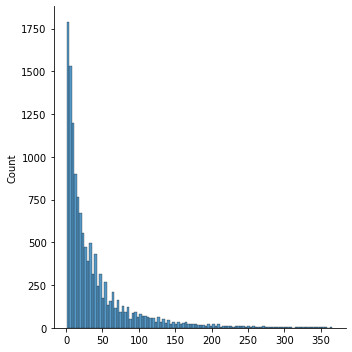

In [103]:
#hisrogram for differences between order dates
sns.displot(a.apply(lambda x: days_hours_minutes(x)[0]) )

2. Create a new column called Date which contains the invoice date without the timestamp

In [106]:
#differences between first and last orders
b= df_uk.groupby(['CustomerID'])
.agg({'Quantity':'sum','UnitPrice': 'mean', 'date': lambda x: x.max() - x.min()})
.reset_index()['date']

3. Group by CustomerID and check the last date of purchase

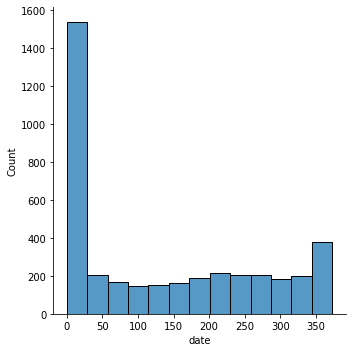

In [108]:
#histogram for differences between first and last orders
sns.displot(b.apply(lambda x: days_hours_minutes(x)[0]), bin )

In [109]:
#making a copy of uk dataframe
df_uk_c = df_uk.copy()

In [110]:
#dropping duplciations
df_uk_c.drop_duplicates(inplace=True)

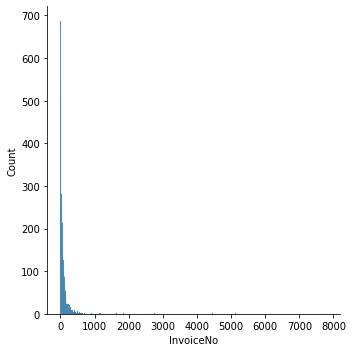

In [111]:
#historgram for how many orders that customer made
sns.displot(df_uk_c.groupby('CustomerID').count()['InvoiceNo'])

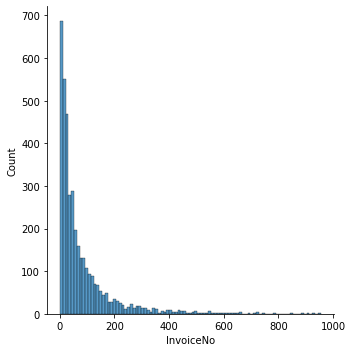

In [115]:
#historgram for how many orders that customer made for less 1000
sns.displot(df_uk_c.groupby('CustomerID').count()[df_uk_c.groupby('CustomerID')
                                                  .count()['InvoiceNo']<1000]['InvoiceNo'])

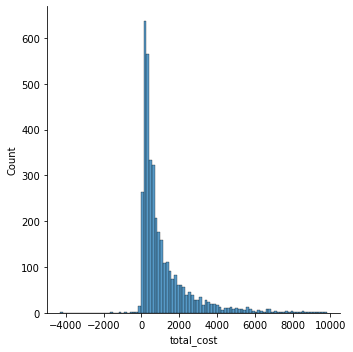

In [123]:
#historgram for how much orders that customer made for less 10000
sns.displot(df_uk.groupby('CustomerID').sum()[df_uk.groupby('CustomerID')
                                              .sum()['total_cost']<10000]['total_cost'])

In [141]:
#merging the tables made above
a = df_uk_c.groupby('CustomerID').count()[['InvoiceNo']]
b = df_uk.groupby('CustomerID').sum()[['total_cost']]
c = df_uk.groupby(['CustomerID']).agg({'date': lambda x: x.max() - x.min()})[['date']]

In [146]:
#merging the tables made above
df_rfm = pd.merge(a, b,on ='CustomerID').merge(c, on ='CustomerID')
df_rfm

,InvoiceNo,total_cost,date
CustomerID,,,
12346.0,2,0.00,0 days
12747.0,103,4196.01,367 days
12748.0,4459,29072.10,373 days
12749.0,231,3868.20,210 days
12820.0,59,942.34,323 days
...,...,...,...
18280.0,10,180.60,0 days
18281.0,7,80.82,0 days
18282.0,13,176.60,119 days


In [162]:
# dividing quartilies
df_rfm['freq_qu'] = pd.qcut(df_rfm['InvoiceNo'], q = 4, labels = False)
df_rfm['rev_qu'] = pd.qcut(df_rfm['date'], q = 5, labels = False, duplicates='drop')
df_rfm['cost_qu']= pd.qcut(df_rfm['total_cost'], q = 4, labels = False)
df_rfm

,InvoiceNo,total_cost,date,freq_qu,rev_qu,cost_qu
CustomerID,,,,,,
12346.0,2,0.00,0 days,0,0,0
12747.0,103,4196.01,367 days,3,3,3
12748.0,4459,29072.10,373 days,3,3,3
12749.0,231,3868.20,210 days,3,2,3
12820.0,59,942.34,323 days,2,3,2
...,...,...,...,...,...,...
18280.0,10,180.60,0 days,0,0,0
18281.0,7,80.82,0 days,0,0,0
18282.0,13,176.60,119 days,0,1,0


In [168]:
#refactoring values for r
df_rfm['rev_qu']=df_rfm.rev_qu.replace({0:3,1:2,2:1,3:0})

In [172]:
# Customer Segmentation with RFM Scores
df_rfm['score']= df_rfm[['rev_qu','freq_qu','cost_qu']].apply((lambda x: (x[0]+x[1]+x[2])/3), axis=1)

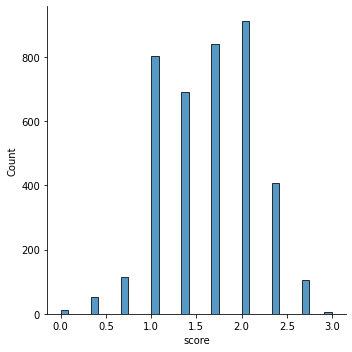

In [173]:
#histogram for scores
sns.displot(df_rfm['score'])

In [174]:
df_rfm.columns

Index(['InvoiceNo', 'total_cost', 'date', 'freq_qu', 'rev_qu', 'cost_qu',
       'score'],
      dtype='object')

In [180]:
#renaming some columns
df_rfm.rename(columns={'InvoiceNo':'count', 'date':'time'}, inplace=True)
df_rfm

,count,total_cost,time,freq_qu,rev_qu,cost_qu,score
CustomerID,,,,,,,
12346.0,2,0.00,0 days,0,3,0,1.000000
12747.0,103,4196.01,367 days,3,0,3,2.000000
12748.0,4459,29072.10,373 days,3,0,3,2.000000
12749.0,231,3868.20,210 days,3,1,3,2.333333
12820.0,59,942.34,323 days,2,0,2,1.333333
...,...,...,...,...,...,...,...
18280.0,10,180.60,0 days,0,3,0,1.000000
18281.0,7,80.82,0 days,0,3,0,1.000000
18282.0,13,176.60,119 days,0,2,0,0.666667


In [221]:
df_rfm_s = df_rfm[['count','total_cost','time','score']]
df_rfm_s

,count,total_cost,time,score
CustomerID,,,,
12346.0,2,0.00,0 days,1.000000
12747.0,103,4196.01,367 days,2.000000
12748.0,4459,29072.10,373 days,2.000000
12749.0,231,3868.20,210 days,2.333333
12820.0,59,942.34,323 days,1.333333
...,...,...,...,...
18280.0,10,180.60,0 days,1.000000
18281.0,7,80.82,0 days,1.000000
18282.0,13,176.60,119 days,0.666667


In [222]:
#getting days from differences between order dates
df_rfm_s.time=df_rfm_s.time.apply(lambda x: days_hours_minutes(x)[0])

<AxesSubplot:>

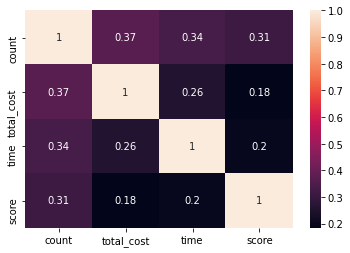

In [223]:
#heatmap for correlation 
sns.heatmap(df_rfm_s.corr(), annot=True)

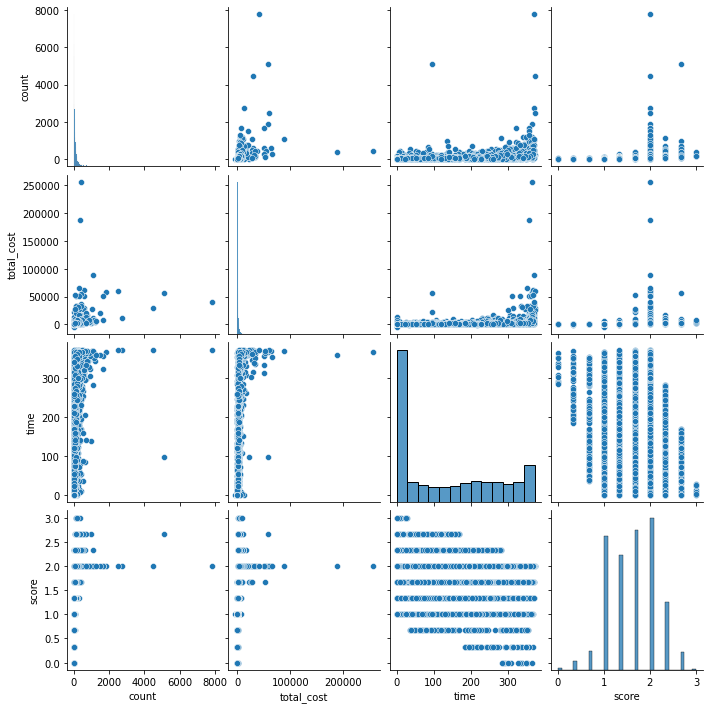

In [224]:
#pairplot for values
sns.pairplot(df_rfm_s)

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

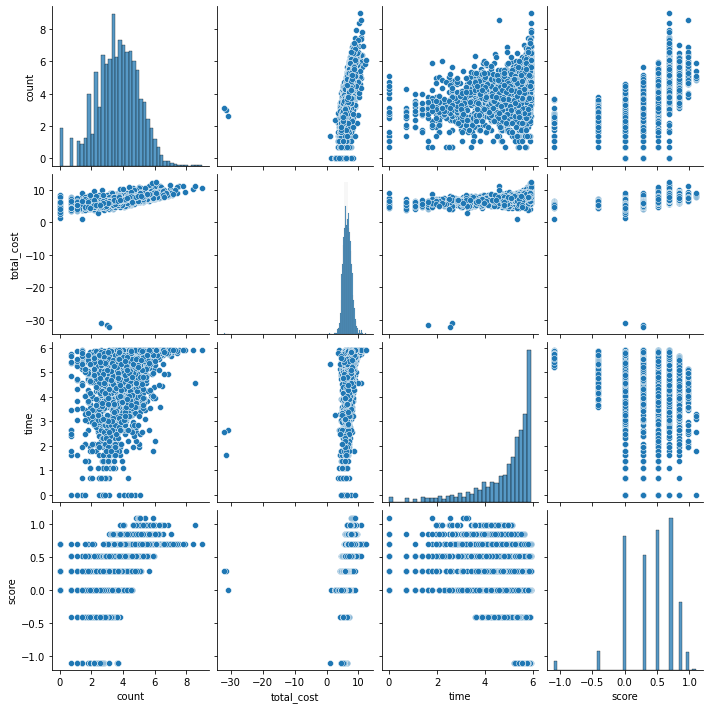

In [193]:
#pairplot for the log values, # since it will be problematic with negative values, positive values are taken
sns.pairplot(np.log(df_rfm_s[df_rfm_s >0]))

In [197]:
#The Elbow Method
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(np.log(df_rfm_s[df_rfm_s >0]).dropna())
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

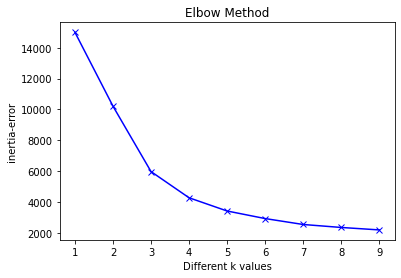

In [198]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

In [199]:
#choosing cluster as 3
model=KMeans(n_clusters = 3)
model.fit(np.log(df_rfm_s[df_rfm_s >0]).dropna())
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
df_tem = df_rfm_s[df_rfm_s >0].dropna()

In [215]:
df_tem['cluster'] = model.labels_

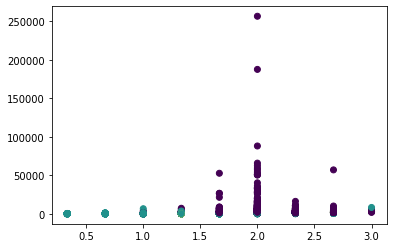

In [358]:
plt.scatter(df_tem.iloc[:,3], df_tem.iloc[:,1], c=model.labels_, cmap="viridis")

In [217]:
#groupping values according to clusters
df_tem.groupby('cluster').mean()

,count,total_cost,time,score
cluster,,,,
0,192.246521,3.771635e+03,259.255799,1.968191
1,33.238832,5.876068e+02,114.737113,1.376289
2,18.666667,2.546111e-14,10.666667,1.222222


**Conclusion**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently, frequent buyers , and spent the most 

- Cluster 1 : Second cluster can be interpreted as passer customers as their last purchase is long ago ,purchased very few  and spent little .Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 2 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time, but used to purchase frequently and spent a lot.

In [239]:
from datetime import datetime

In [257]:
type(df_uk.InvoiceDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [272]:
#generation a column for the date with the beginning of the month
df_uk['date']=df_uk.InvoiceDate.apply(lambda x: datetime(x.to_pydatetime().year,(x.to_pydatetime().month),1))

In [278]:
#generation a column for the date from InvoiceDate
df_uk['actual_date']=df_uk.InvoiceDate.apply(lambda x: datetime(x.to_pydatetime().year,
                                            (x.to_pydatetime().month),(x.to_pydatetime().day)))

In [279]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date,year,month,actual_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-01,2011,12,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-01,2011,12,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-01,2011,12,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-01,2011,12,2011-12-09


In [276]:
#extracting month and year
df_uk['year']= df_uk.date.apply(lambda x: x.year)
df_uk['month']= df_uk.date.apply(lambda x: x.month)
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-01,2011,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-01,2011,12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-01,2011,12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-01,2011,12


<AxesSubplot:>

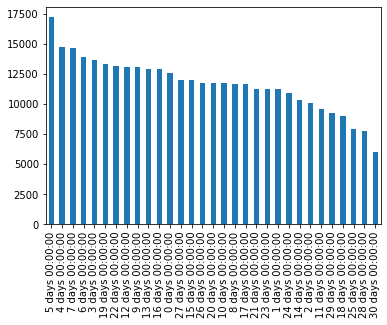

In [284]:
#differnce between actual and made dates
(df_uk['actual_date']-df_uk['date']).value_counts().plot.bar()

In [292]:
#sold products
df_uk[df_uk.InvoiceNo.str.contains('C')!=True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date,year,month,actual_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-01,2011,12,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-01,2011,12,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-01,2011,12,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-01,2011,12,2011-12-09


In [287]:
#sold products count pivot table
df_uk.pivot_table(index='month', columns='year', values='InvoiceNo', aggfunc='count')

year,2010,2011
month,,
1,NaN,18738.0
2,NaN,18110.0
3,NaN,24587.0
4,NaN,21358.0
5,NaN,25738.0
6,NaN,24296.0
7,NaN,24170.0
8,NaN,23623.0
9,NaN,36333.0


In [300]:
#groupping by products regarding to total cost, quantity, and unit price
df_coh = df_uk.groupby('InvoiceNo').agg({'total_cost':'sum','Quantity':'sum','UnitPrice':'mean'})
df_coh.reset_index(inplace=True)

In [309]:
df_coh

,InvoiceNo,total_cost,Quantity,UnitPrice
0,536365,139.12,40,3.910000
1,536366,22.20,12,1.850000
2,536367,278.73,83,4.853333
3,536368,70.05,15,4.775000
4,536369,17.85,3,5.950000
...,...,...,...,...
19852,C581484,-168469.60,-80995,2.080000
19853,C581490,-32.53,-23,1.390000
19854,C581499,-224.69,-1,224.690000
19855,C581568,-54.75,-5,10.950000


In [310]:
#merging groupped dataframe with older one to get date columns
df_coh_wt_date=pd.merge(df_coh, df_uk[['date','year','month','actual_date','InvoiceNo']], on='InvoiceNo').drop_duplicates()
df_coh_wt_date

,InvoiceNo,total_cost,Quantity,UnitPrice,date,year,month,actual_date
0,536365,139.12,40,3.910000,2010-12-01,2010,12,2010-12-01
7,536366,22.20,12,1.850000,2010-12-01,2010,12,2010-12-01
9,536367,278.73,83,4.853333,2010-12-01,2010,12,2010-12-01
21,536368,70.05,15,4.775000,2010-12-01,2010,12,2010-12-01
25,536369,17.85,3,5.950000,2010-12-01,2010,12,2010-12-01
...,...,...,...,...,...,...,...,...
361871,C581484,-168469.60,-80995,2.080000,2011-12-01,2011,12,2011-12-09
361872,C581490,-32.53,-23,1.390000,2011-12-01,2011,12,2011-12-09
361874,C581499,-224.69,-1,224.690000,2011-12-01,2011,12,2011-12-09
361875,C581568,-54.75,-5,10.950000,2011-12-01,2011,12,2011-12-09


Text(0.5, 1.0, 'Return')

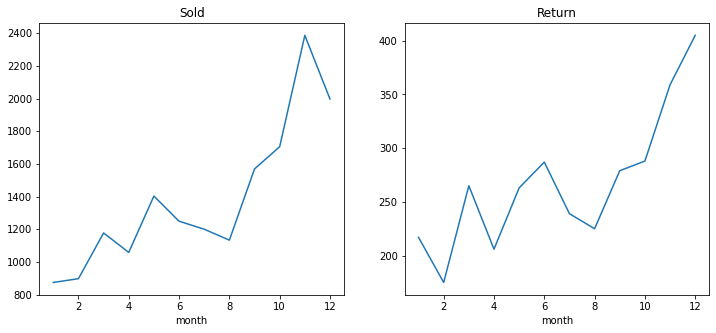

In [355]:
#plotting return and sold products 
fig, axs = plt.subplots(1,2, figsize=(12,5))
df_coh_wt_date[df_coh_wt_date['InvoiceNo'].str.contains('C')!=True].groupby('month').count()['InvoiceNo'].plot(ax=axs[0])
axs[0].set_title('Sold')
df_coh_wt_date[df_coh_wt_date['InvoiceNo'].str.contains('C')==True].groupby('month').count()['InvoiceNo'].plot(ax=axs[1])
axs[1].set_title('Return')

In [314]:
#the total cost 
df_coh_wt_date.pivot_table(index='month', columns='year', values='total_cost', aggfunc='sum')

year,2010,2011
month,,
1,NaN,351981.280
2,NaN,348853.630
3,NaN,456917.870
4,NaN,376744.411
5,NaN,525573.350
6,NaN,472509.250
7,NaN,461147.601
8,NaN,477008.410
9,NaN,776529.842


In [315]:
#the number of products sold
df_coh_wt_date.pivot_table(index='month', columns='year', values='Quantity', aggfunc='sum')

year,2010,2011
month,,
1,NaN,198957.0
2,NaN,211524.0
3,NaN,272305.0
4,NaN,247915.0
5,NaN,296101.0
6,NaN,274640.0
7,NaN,297977.0
8,NaN,301937.0
9,NaN,447596.0


In [319]:
#the average unit price
df_coh_wt_date.pivot_table(index='month', columns='year', values='UnitPrice', aggfunc='mean')

year,2010,2011
month,,
1,NaN,4.697045
2,NaN,5.130697
3,NaN,4.696464
4,NaN,7.564532
5,NaN,19.089141
6,NaN,31.518286
7,NaN,13.686754
8,NaN,8.447320
9,NaN,7.065182


In [322]:
#the number of transcation
df_coh_wt_date.pivot_table(index='month', columns='year', values='InvoiceNo', aggfunc='count')

year,2010,2011
month,,
1,NaN,1091.0
2,NaN,1072.0
3,NaN,1442.0
4,NaN,1264.0
5,NaN,1666.0
6,NaN,1536.0
7,NaN,1439.0
8,NaN,1358.0
9,NaN,1848.0


Text(0.5, 1.0, 'Total Count')

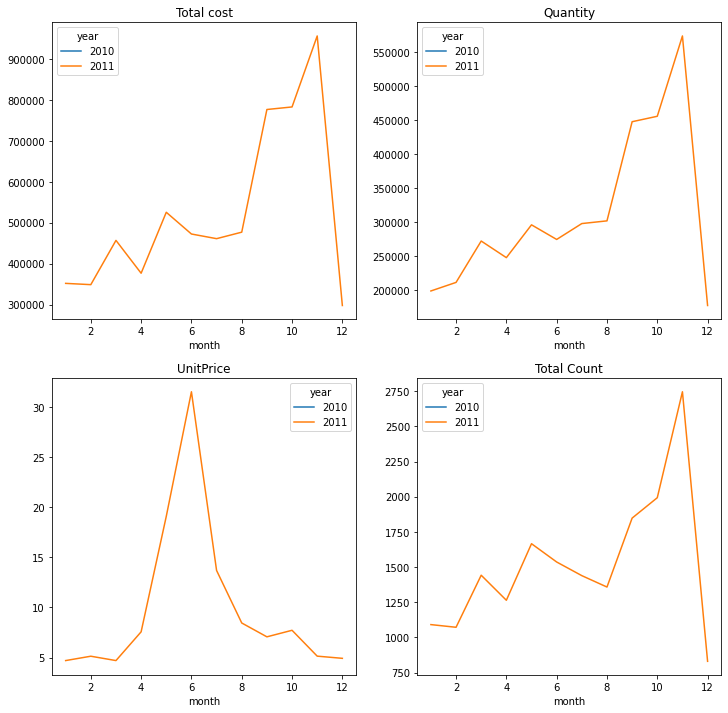

In [342]:
#plotting for total cost, quantity, unit price and total count over months
fig, axs = plt.subplots(2,2, figsize=(12,12))
df_coh_wt_date.pivot_table(index='month', columns='year', values='total_cost', aggfunc='sum').plot(ax=axs[0,0])
axs[0,0].set_title('Total cost')
df_coh_wt_date.pivot_table(index='month', columns='year', values='Quantity', aggfunc='sum').plot(ax=axs[0,1])
axs[0,1].set_title('Quantity')
df_coh_wt_date.pivot_table(index='month', columns='year', values='UnitPrice', aggfunc='mean').plot(ax=axs[1,0])
axs[1,0].set_title('UnitPrice')
df_coh_wt_date.pivot_table(index='month', columns='year', values='InvoiceNo', aggfunc='count').plot(ax=axs[1,1])
axs[1,1].set_title('Total Count')

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?